<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [5]:
# set classes
K = len(set(y_train))
print("Number classes:", K)

Number classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# compile and fit
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5701 - accuracy: 0.4252 - val_loss: 1.3017 - val_accuracy: 0.5238
Epoch 2/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2963 - accuracy: 0.5317 - val_loss: 1.1470 - val_accuracy: 0.5827
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1633 - accuracy: 0.5816 - val_loss: 1.0778 - val_accuracy: 0.6126
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0677 - accuracy: 0.6190 - val_loss: 1.0381 - val_accuracy: 0.6330
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9880 - accuracy: 0.6477 - val_loss: 0.9715 - val_accuracy: 0.6670
Epoch 6/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9318 - accuracy: 0.6681 - val_loss: 0.8979 - val_accuracy: 0.6869
Epoch 7/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8721 - accuracy: 0.6912 - val_loss: 0.8782 -

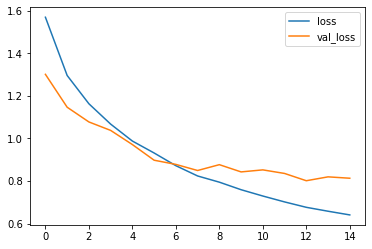

In [8]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

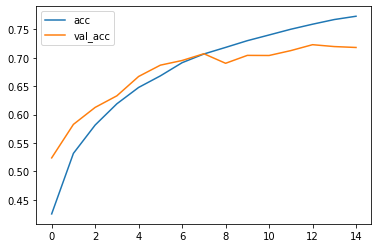

In [9]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion Matrix, without normalization
[[744  17  53  14  21   8  13  18  75  37]
 [  5 876   4   1   5   6  12   4  28  59]
 [ 68   6 562  49 102  65  90  41  13   4]
 [ 14  15  67 413  98 207 114  46  11  15]
 [ 28   3  54  33 686  36  65  85   7   3]
 [  9   4  47 136  66 618  50  59   3   8]
 [  7   7  29  24  38  24 860   5   3   3]
 [  7   2  32  27  52  42  10 820   2   6]
 [ 60  25   7   9  12   8   8   7 845  19]
 [ 26 108  12  13   6   8  12  22  37 756]]


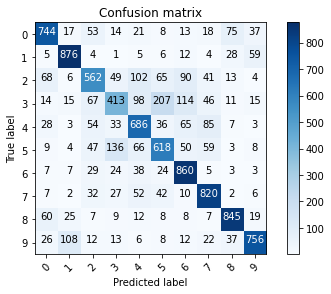

In [12]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel("Predicted label")


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
#label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: airplane Predicted: bird')

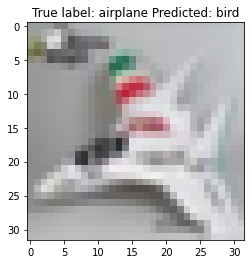

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))